## Mixture Modelling of TSM stock

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


count     38.000000
mean      76.897606
std       34.639756
min       32.732170
25%       46.675326
50%       71.024689
75%      114.605553
max      127.964850
Name: Adj Close, dtype: float64

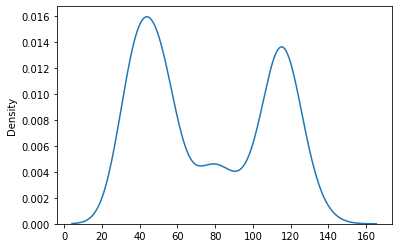

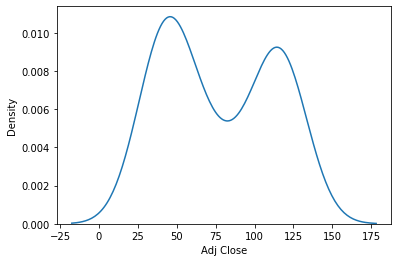

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf
start_date = datetime(2019,1,1)
end_date = datetime(2022,2,4)
plt.figure(1)
STOCK = yf.download('TSM',start_date ,end_date).   #TSM stock from 2019 to 2022
sns.kdeplot(data=STOCK['Adj Close'].values)
STOCK['Adj Close'].describe()
plt.figure(2)
MONTH = STOCK.resample('M').mean()
sns.kdeplot(data=MONTH['Adj Close'])
MONTH['Adj Close'].describe()

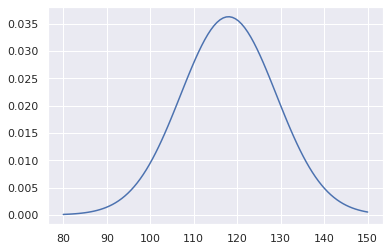

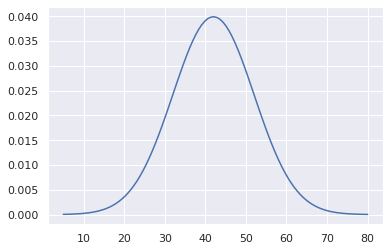

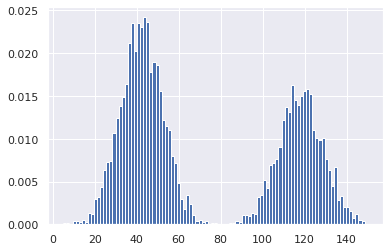

In [ ]:

# -*- coding: utf-8 -*-
"""
Mixture Modeling: Preiliminary
Generation of the TSM graph(obtained from yahoo finance) by playing with mean and std deviation
"""
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
'''Normal Distribution '''
u = np.random.normal(0,1,1);
#second peak
mu_1 = 118;
Sigma1 = 121; 
r1 = mu_1 + math.sqrt(Sigma1)*u;
''' Visualize y_1 = f(x_1) '''
sigma_1 = math.sqrt(Sigma1);
x_1 = np.linspace(80, 150, 100)
y_1 = ss.norm.pdf(x_1, mu_1, sigma_1)
plt.figure(2)
plt.plot(x_1, y_1)

#first peak
mu_2 = 42;
Sigma2 = 100; 
r2 = mu_2 + math.sqrt(Sigma2)*u;
# Visualize y_2 = f(x_2)
sigma_2 = math.sqrt(Sigma2);
x_2 = np.linspace(5, 80, 100)
# x_2 = np.linspace(2000, 8000, 6000)
y_2 = ss.norm.pdf(x_2, mu_2, sigma_2)
plt.figure(3)
plt.plot(x_2, y_2)
#Normal Mixture
p = 0.4; 
S = 5000;
r = np.zeros(S);
y = np.zeros(S);
for s in range(1,S):
    eps = np.random.normal(0,1,1);
    r1 = mu_1 + math.sqrt(Sigma1)*eps;
    r2 = mu_2 + math.sqrt(Sigma2)*eps;
    u = np.random.uniform(0,1,1);
    r[s] = r1*(u<p)+r2*(u>=p);
plt.figure(5)
plt.hist(r, bins = np.linspace(5,150,100),density = True);


The TSM graph has thus been generated similar to the one obtained from yahoo finance